In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize']=(10,6)

In [3]:
df=pd.read_csv('heights.csv')
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [4]:
df.sample(5)

,name,height
7,selena,6.5
1,maria,5.2
6,dmitry,6.2
0,mohan,5.9
13,binod,5.5


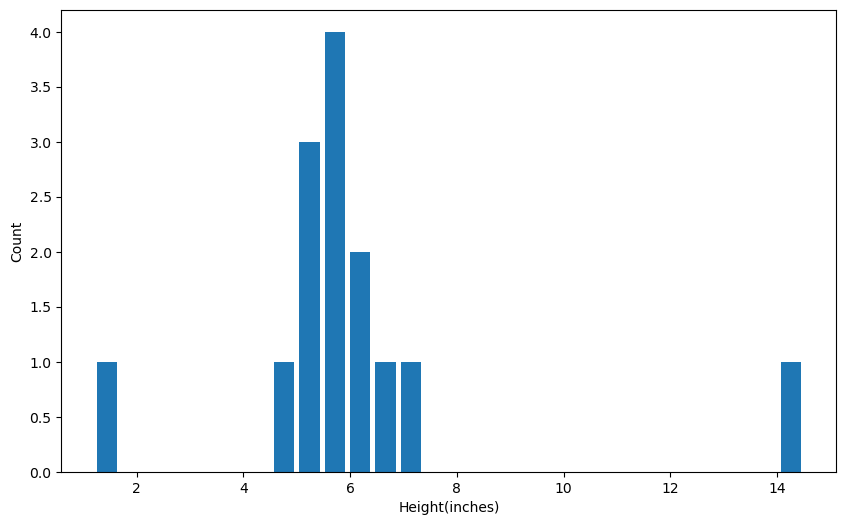

In [5]:
plt.hist(df.height,bins=28,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [6]:
df.height.min()

1.2

In [7]:
df.height.max()

14.5

In [8]:
df.height.describe()

count    14.000000
mean      6.050000
std       2.779804
min       1.200000
25%       5.250000
50%       5.550000
75%       6.175000
max      14.500000
Name: height, dtype: float64

In [9]:
from scipy.stats import norm
plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height (inches)')
plt.ylabel('count')

Text(0, 0.5, 'count')

In [10]:
rng=np.arange(df.height.min(),df.height.max(),0.1)

In [11]:
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

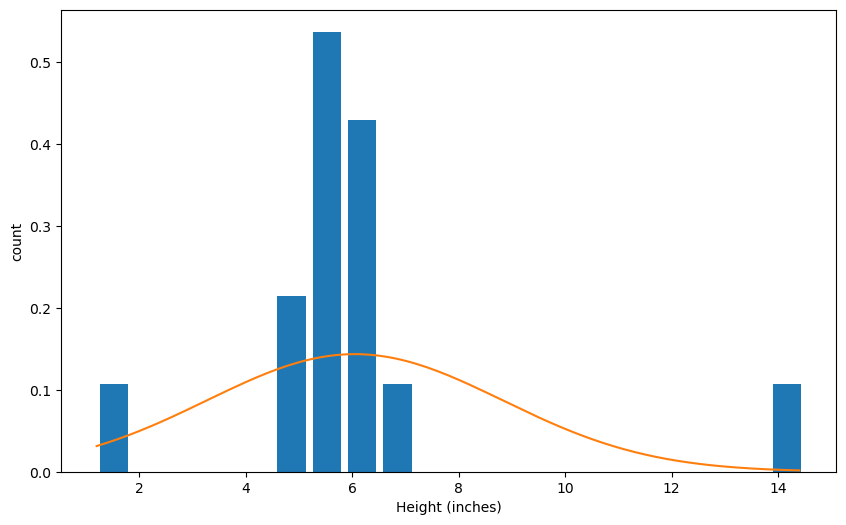

In [12]:
plt.show()

In [13]:
df.height.mean()

np.float64(6.05)

In [14]:
df.height.std()

2.779803534839772

In [18]:
upper_limit=df.height.mean()+3*df.height.std()

In [19]:
upper_limit

np.float64(14.389410604519316)

In [20]:
lower_limit=df.height.mean()-3*df.height.std()

In [21]:
lower_limit

np.float64(-2.2894106045193157)

In [42]:
df[(df.height>upper_limit)|(df.height<lower_limit)]

,name,height,Zscore
9,imran,14.5,3.039783


In [27]:
df_no_outlier_std_dev=df[(df.height<upper_limit)|(df.height>lower_limit)]
df_no_outlier_std_dev.shape

(14, 2)

In [28]:
df.shape[0] - df_no_outlier_std_dev.shape[0]


0

# Alternative way is Z Score


In [30]:
df['Zscore']=(df.height-df.height.mean())/df.height.std()
df

,name,height,Zscore
0,mohan,5.9,-0.053961
1,maria,5.2,-0.305777
2,sakib,5.1,-0.341751
3,tao,5.5,-0.197856
4,virat,4.9,-0.413698
5,khusbu,5.4,-0.233829
6,dmitry,6.2,0.053961
7,selena,6.5,0.161882
8,john,7.1,0.377725
9,imran,14.5,3.039783


In [33]:
df[df['Zscore']>3]


,name,height,Zscore
9,imran,14.5,3.039783


In [34]:
df[df['Zscore']<-3]

,name,height,Zscore


In [37]:
df[(df.Zscore<-3)|(df.Zscore>3)]

,name,height,Zscore
9,imran,14.5,3.039783


In [39]:
df_no_outliers=df[(df.Zscore>-3) &(df.Zscore<3)]
df_no_outliers

,name,height,Zscore
0,mohan,5.9,-0.053961
1,maria,5.2,-0.305777
2,sakib,5.1,-0.341751
3,tao,5.5,-0.197856
4,virat,4.9,-0.413698
5,khusbu,5.4,-0.233829
6,dmitry,6.2,0.053961
7,selena,6.5,0.161882
8,john,7.1,0.377725
10,jose,6.1,0.017987


In [40]:
df.shape[0]-df_no_outliers.shape[0]

1

In [ ]:
# removed one lier in total